In [28]:
import os
import cv2
import matplotlib.pyplot as plt
import numpy as np

In [29]:
data_path = 'C:/Users/Thep Ho/Desktop/Thesis/data/root/all'
save_image_path = 'C:/Users/Thep Ho/Desktop/Thesis/sub-task/save-all/images'
save_mask_path = 'C:/Users/Thep Ho/Desktop/Thesis/sub-task/save-all/masks'

In [30]:
image_path = data_path + '/images/'
mask_path = data_path + '/masks/'

In [31]:
images = []
masks = []

for path in os.listdir(image_path):
    images.append(image_path + path)

for path in os.listdir(mask_path):
    masks.append(mask_path + path)

images = sorted(images)
masks = sorted(masks)

print(len(images))
print(len(masks))

737
737


In [27]:
siz_x, siz_y = [512, 512]

for i in range(len(images)):
    img = cv2.imread(images[i])
    mask = cv2.imread(masks[i])

    #convert img to grey
    mask_grey = cv2.cvtColor(mask, cv2.COLOR_BGR2GRAY)

    #get threshold image
    ret, thresh_mask = cv2.threshold(mask_grey, 100, 255, cv2.THRESH_BINARY)

    #find contours
    contours, hierarchy = cv2.findContours(thresh_mask, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
    x, y, _, _ = cv2.boundingRect(contours[0])

    # get width height
    height, width = img.shape[:2]

    # new x, y
    if (x + siz_x > width):
        x = x + (width - (x + siz_x))
    else:
        x = 0 if x - 30 < 0 else x - 30

    if (y + siz_y > height):
        y = y + (height - (y + siz_y))
    else:
        y = 0 if y - 30 < 0 else y - 30
    
    plt.imsave(save_image_path + '/' + 'nt-' + str(i) + '.jpg', img[y:y+siz_y, x:x+siz_x])
    plt.imsave(save_mask_path + '/' + 'nt-' + str(i) + '.jpg', mask_grey[y:y+siz_y, x:x+siz_x])

### Test build

In [9]:
idx = 5
print(images[idx])
print(masks[idx])

C:/Users/Thep Ho/Desktop/Thesis/data/cus/origin/images/nt-103.png
C:/Users/Thep Ho/Desktop/Thesis/data/cus/origin/masks/nt-103.png


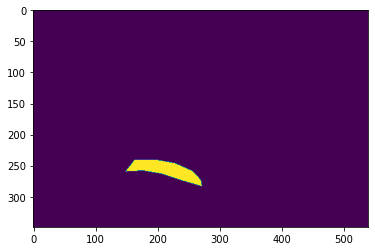

In [10]:
img = cv2.imread(images[idx])
mask = cv2.imread(masks[idx])
#convert img to grey
mask_grey = cv2.cvtColor(mask, cv2.COLOR_BGR2GRAY)
#get threshold image
ret, thresh_mask = cv2.threshold(mask_grey, 100, 255, cv2.THRESH_BINARY)
plt.imshow(mask_grey)

In [11]:
#find contours
contours, hierarchy = cv2.findContours(thresh_mask, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
x, y, _, _ = cv2.boundingRect(contours[0])
print('x =', x)
print('y =', y)

x = 149
y = 241


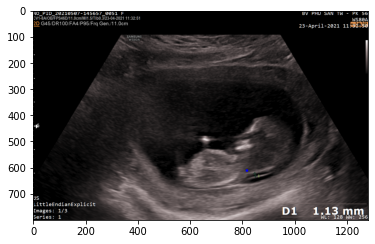

In [22]:
cv2.circle(img, (x, y), 5, (0, 0, 255), -1)
plt.imshow(img)

In [12]:
# mod 
height, width = img.shape[:2]

if (x + 256 > width):
    x = x + (width - (x + 256))
else:
    x = 0 if x - 30 < 0 else x - 30

if (y + 256 > height):
    y = y + (height - (y + 256))
else:
    y = 0 if y - 30 < 0 else y - 30

print('x =', x)
print('y =', y)

x = 119
y = 93


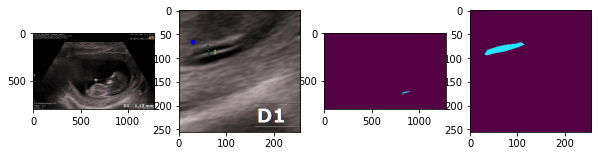

In [24]:
# show _img, _mask and img, mask in a one line 
plt.figure(figsize=(10, 10))
plt.subplot(1, 4, 1)
plt.imshow(img)
plt.subplot(1, 4, 2)
plt.imshow(img[y:y+256, x:x+256])
plt.subplot(1, 4, 3)
plt.imshow(mask)
plt.subplot(1, 4, 4)
plt.imshow(mask[y:y+256, x:x+256])

plt.show()